In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_file_path = 'sign_mnist_train.csv'
test_file_path = 'sign_mnist_test.csv'
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [3]:
train.head()
# 28x28 = 784
# labels correspond to letters (EX: A = 0, B = 1...)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels = train['label'].values

In [5]:
#drop the labels
train.drop('label', axis = 1, inplace=True)

In [6]:
images = train.values
# make a np array [[img1],[img2]...]
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

3


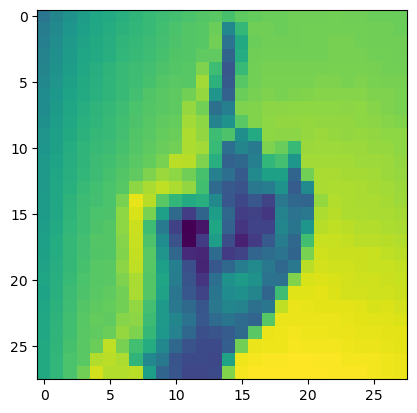

In [7]:
index = 0
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [8]:
!pip uninstall opencv-python opencv-python-headless -y
!pip install opencv-python


Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)


In [9]:
# Use OpenCV to view 10 random images from our training data

# import cv2
# import numpy as np
# for i in range(0,10):
#     rand = np. random. randint(0, len(images) )
    
#     input_im= images[rand]
#     sample = input_im.reshape(28,28).astype(np.uint8)
#     sample= cv2.resize(sample, None, fx=10, fy=10,interpolation = cv2.INTER_CUBIC)
#     cv2. imshow("sample image", sample)
#     cv2. waitKey(0)

# cv2. destroyAllWindows ()

In [10]:
# transform labels to binary vectors
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state = 101)
batch_size = 128
num_classes = 24
epochs = 10

In [12]:
# scale
x_train = x_train/255
x_test = x_test/255
# resize required by TF, Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [13]:
# !pip install tensorflow

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the model with Input layer
model = Sequential()
model.add(Input(shape=(28, 28, 1)))  # Define the input shape here
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='softmax'))



In [15]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

In [16]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (19218, 28, 28, 1)
y_train shape: (19218, 24)
x_test shape: (8237, 28, 28, 1)
y_test shape: (8237, 24)


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.1023 - loss: 3.0186 - val_accuracy: 0.4647 - val_loss: 1.7905
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.4519 - loss: 1.6542 - val_accuracy: 0.6945 - val_loss: 0.9343
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.6704 - loss: 0.9742 - val_accuracy: 0.7764 - val_loss: 0.6579
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.7669 - loss: 0.6757 - val_accuracy: 0.8680 - val_loss: 0.4143
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.8444 - loss: 0.4641 - val_accuracy: 0.8771 - val_loss: 0.3602
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.8832 - loss: 0.3538 - val_accuracy: 0.9421 - val_loss: 0.1956
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9157 - loss: 0.2532 - val_accuracy: 0.9593 - val_loss: 0.1333
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9430 - loss: 0.1758 -

Model Saved


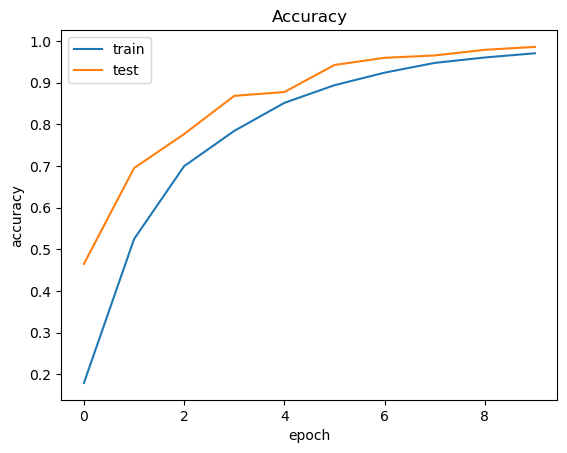

In [17]:
#train model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

# Save our Model
model. save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

# View our training history graphically
plt.plot(history.history[ 'accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt. title("Accuracy")
plt. xlabel('epoch')
plt.ylabel( 'accuracy')
plt.legend([ 'train', 'test'])
plt. show()

In [18]:
# Create function to match label to letter
def getLetter(result):
    classLabels = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I',
        9: 'K',
        10: 'L',
        11: 'M',
        12: 'N',
        13: 'O',
        14: 'P',
        15: 'Q',
        16: 'R',
        17: 'S',
        18: 'T',
        19: 'U',
        20: 'V',
        21: 'W',
        22: 'X',
        23: 'Y'
    }

    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"


In [59]:
import cv2

# Try opening the camera; change the index if necessary
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("Error: Could not open the camera.")
    exit()

try:
    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Define region of interest
        roi = frame[150:450, 320:620]
        cv2.imshow('ROI', roi)

        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        cv2.imshow('ROI Scaled and Gray', roi)

        copy = frame.copy()
        cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
        
        roi = roi.reshape(1, 28, 28, 1)

        # Ensure `model` and `getLetter` are defined properly
        try:
            predictions = model.predict(roi, verbose=0)
            result = str(predictions.argmax(axis=-1)[0])  # Get the index of the highest score
            cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
        except Exception as e:
            print(f"Error in prediction or display: {e}")

        cv2.imshow('Frame', copy)

        # Wait for the Enter key (13) or Esc key (27)
        if cv2.waitKey(1) & 0xFF == 27: 
            break

finally:
    # Ensure all resources are released correctly
    cap.release()
    cv2.destroyAllWindows()


In [41]:
!pip install pyobjc

  Using cached pyobjc_core-10.3.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (2.5 kB)
  Using cached pyobjc_framework_Cocoa-10.3.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (2.3 kB)
  Using cached pyobjc_framework_libdispatch-10.3.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (2.2 kB)
  Using cached pyobjc_framework_CoreBluetooth-10.3.1-cp36-abi3-macosx_11_0_universal2.whl.metadata (2.3 kB)
Using cached pyobjc_core-10.3.1-cp312-cp312-macosx_10_9_universal2.whl (825 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 3.5 MB/s eta 0:00:00
Using cached pyobjc_framework_Cocoa-10.3.1-cp312-cp312-macosx_10_9_universal2.whl (396 kB)
Using cached pyobjc_framework_CoreBluetooth-10.3.1-cp36-abi3-macosx_11_0_universal2.whl (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 6.1 MB/s eta 0:00:00
Using cached pyobjc_framework_libdispatch-10.3.1-cp312-cp312-macosx_10_9_universal2.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.1 MB/s eta 0:

In [49]:
import cv2
from AVFoundation import AVCaptureDevice

# Function to list available macOS camera devices
def list_cameras():
    devices = AVCaptureDevice.devices()
    camera_devices = [device for device in devices if device.hasMediaType_("vide")]
    print("Available Camera Devices:")
    for device in camera_devices:
        print(f"Name: {device.localizedName()}, Unique ID: {device.uniqueID()}")
        # Removed 'connected()' as it does not exist
        print(f"Model ID: {device.modelID()}")
        # Check if the device is connected in a different way
        print(f"Is Connected: {'connected' in device.deviceType()}")


# Run the functions
list_cameras()

Available Camera Devices:
Name: FaceTime HD Camera, Unique ID: FDF90FEB-59E5-4FCF-AABD-DA03C4E19BFB
Model ID: FaceTime HD Camera
Is Connected: False
Name: Chloe’s iPhone Camera, Unique ID: AC144DB7-027F-4C09-AA3B-2E3700000001
Model ID: iPhone14,2
Is Connected: False
